In [1]:
import pyscf
import pyscf.gto
import pyscf.qmmm
import pyscf.scf
import pyscf.dft
import pyscf.lib
from pyscf.data import nist
import matplotlib.pyplot as plt
import quadpy
import numpy as np

In [2]:
def nuclei_nuclei(coordinates, charges, query):
    natoms = len(coordinates)
    ret = 0.0
    for i in range(natoms):
        d = np.linalg.norm((coordinates[i] - query))
        ret += charges[i]  / d
    return ret

In [19]:
mol = pyscf.gto.Mole()
mol.atom = '''C    1.5147581    1.4639280   -0.5857809 
C    2.6655760    0.6074861   -0.1584450 
C    3.0322940    0.1780883    1.0801029 
C    2.3156168    0.4805902    2.3997865 
C    2.4115541    1.9785282    2.7598614 
C    0.8696774   -0.1067064    2.4459557 
C    0.8815079   -1.6185099    2.1664647 
C    0.1752930    0.1773510    3.7877438 
C    4.2776346   -0.6508930    1.0935659 
O    4.8221492   -1.1476605    0.0887116 
N    4.8706621   -0.9070130    2.3143298 
O    6.1134299   -1.5168216    2.2361307 
H    1.8807011    2.3175185   -1.2028682 
H    0.9102261    1.8743706    0.2462678 
H    0.8310188    0.8842321   -1.2503174 
H    3.3259250    0.2606388   -0.9757457 
H    2.8473242   -0.0759801    3.2047019 
H    1.8052835    2.6132310    2.0776478 
H    3.4647233    2.3283809    2.6830830 
H    2.0696254    2.1738929    3.7986951 
H    0.2702764    0.3836607    1.6451599 
H    1.4666829   -2.1615294    2.9439662 
H    1.3342125   -1.8533853    1.1791452 
H   -0.1517205   -2.0306041    2.1753759 
H    0.7681483   -0.2312656    4.6391173 
H   -0.8247149   -0.3088296    3.8173736 
H    0.0199281    1.2625154    3.9702544 
H    4.8323775   -0.2455355    3.0949287 
H    6.1578666   -1.6664084    1.2361224 '''
mol.basis = "def2-SVP"
mol.build()

In [20]:
calc = pyscf.scf.RHF(mol)
hfe = calc.kernel(verbose=0)

converged SCF energy = -554.392004378503


In [21]:
dm1_ao = calc.make_rdm1()
print (calc.e_tot)

-554.3920043785033


In [22]:
#mol.set_rinv_orig_(mol.atom_coords()[site])
#print("ELECTRONIC_EPN", site, np.matmul(dm1_ao, mol.intor("int1e_rinv")).trace())

In [23]:
scheme = quadpy.sphere.lebedev_031()

In [64]:
site = mol.atom_coords()[10]/1.88973
pts = site + scheme.points*1.1

In [65]:
querys = pts*1.88973
esp = []
for query in querys:
    mol.set_rinv_orig_(query)
    electronic = np.matmul(dm1_ao, mol.intor("int1e_rinv")).trace()
    nuclear = nuclei_nuclei(mol.atom_coords(), mol.atom_charges(), query)
    esp.append(-electronic + nuclear)
print (min(esp))

-0.02729740906995559


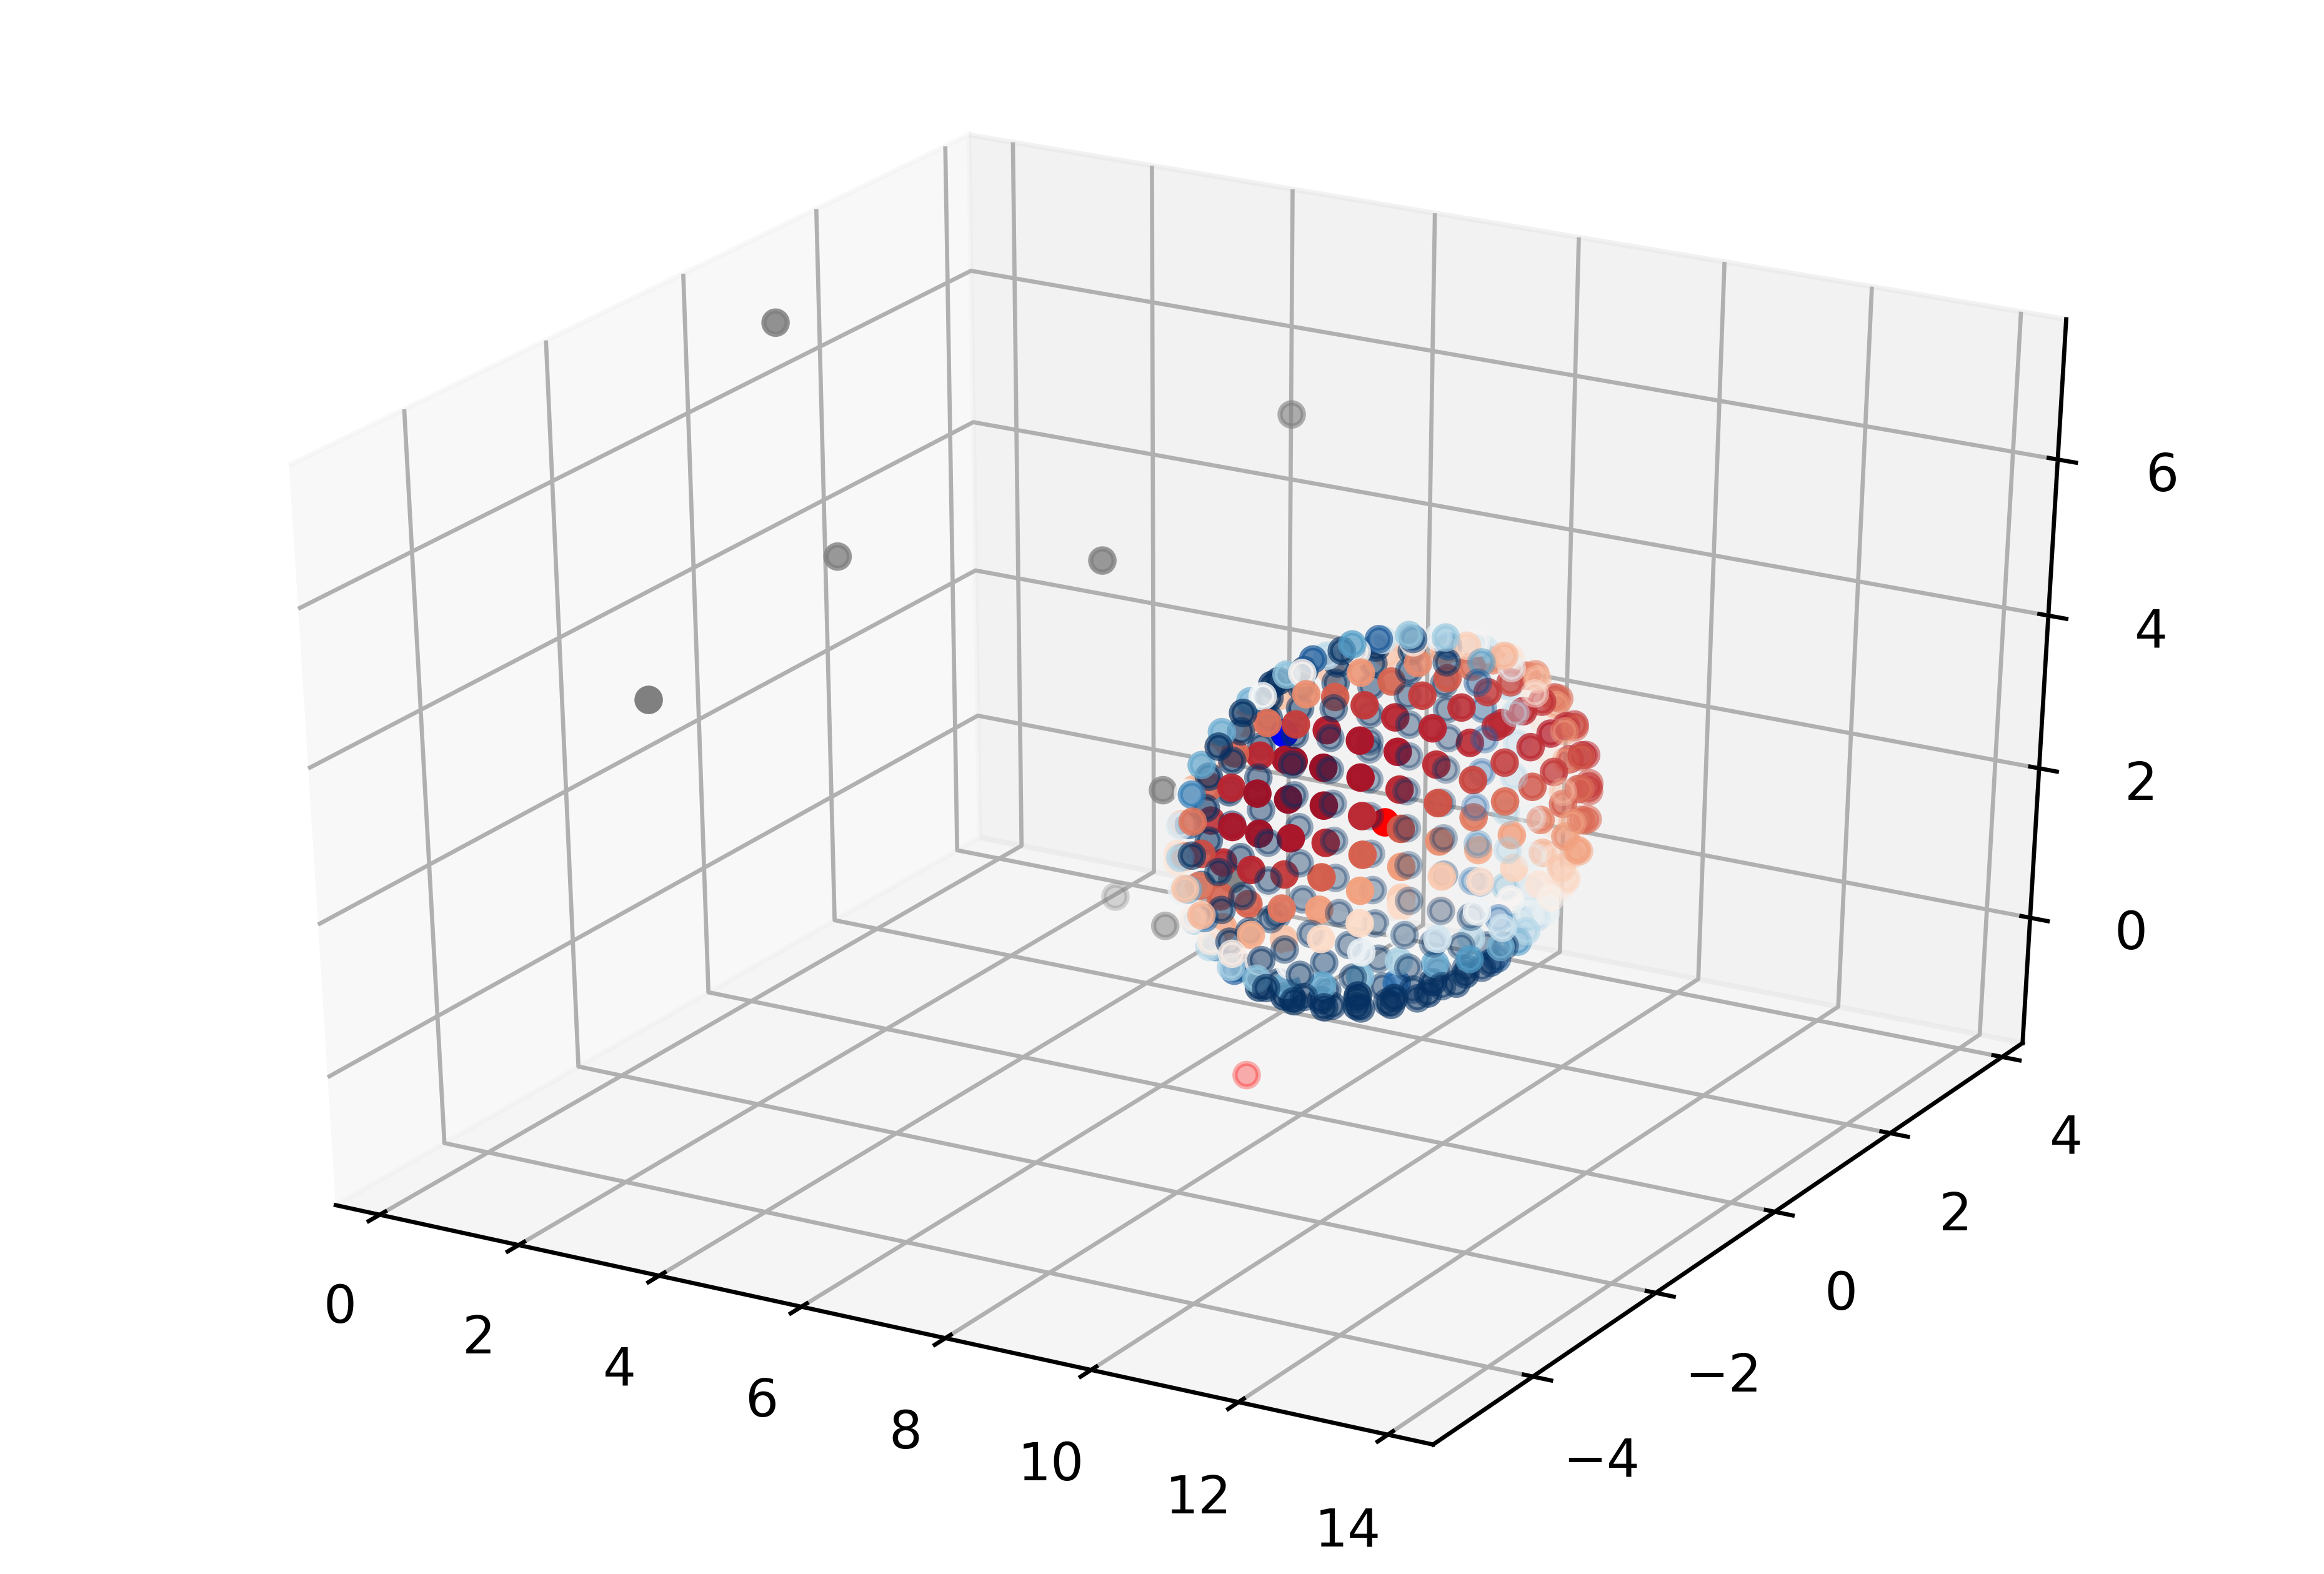

In [57]:
from mpl_toolkits.mplot3d import axes3d, Axes3D #<-- Note the capitalization! 
fig = plt.figure(dpi=600)
coords = mol.atom_coords()
ax = Axes3D(fig)
ax.scatter(querys[:, 0], querys[:, 1], querys[:, 2],c=esp, cmap='RdBu', vmin=-.1, vmax=.1)

Cs = coords[mol.atom_charges()==6]
ax.scatter(Cs[:, 0], Cs[:, 1], Cs[:, 2],c="grey")

Cs = coords[mol.atom_charges()==7]
ax.scatter(Cs[:, 0], Cs[:, 1], Cs[:, 2],c="blue")

Cs = coords[mol.atom_charges()==8]
ax.scatter(Cs[:, 0], Cs[:, 1], Cs[:, 2],c="red")

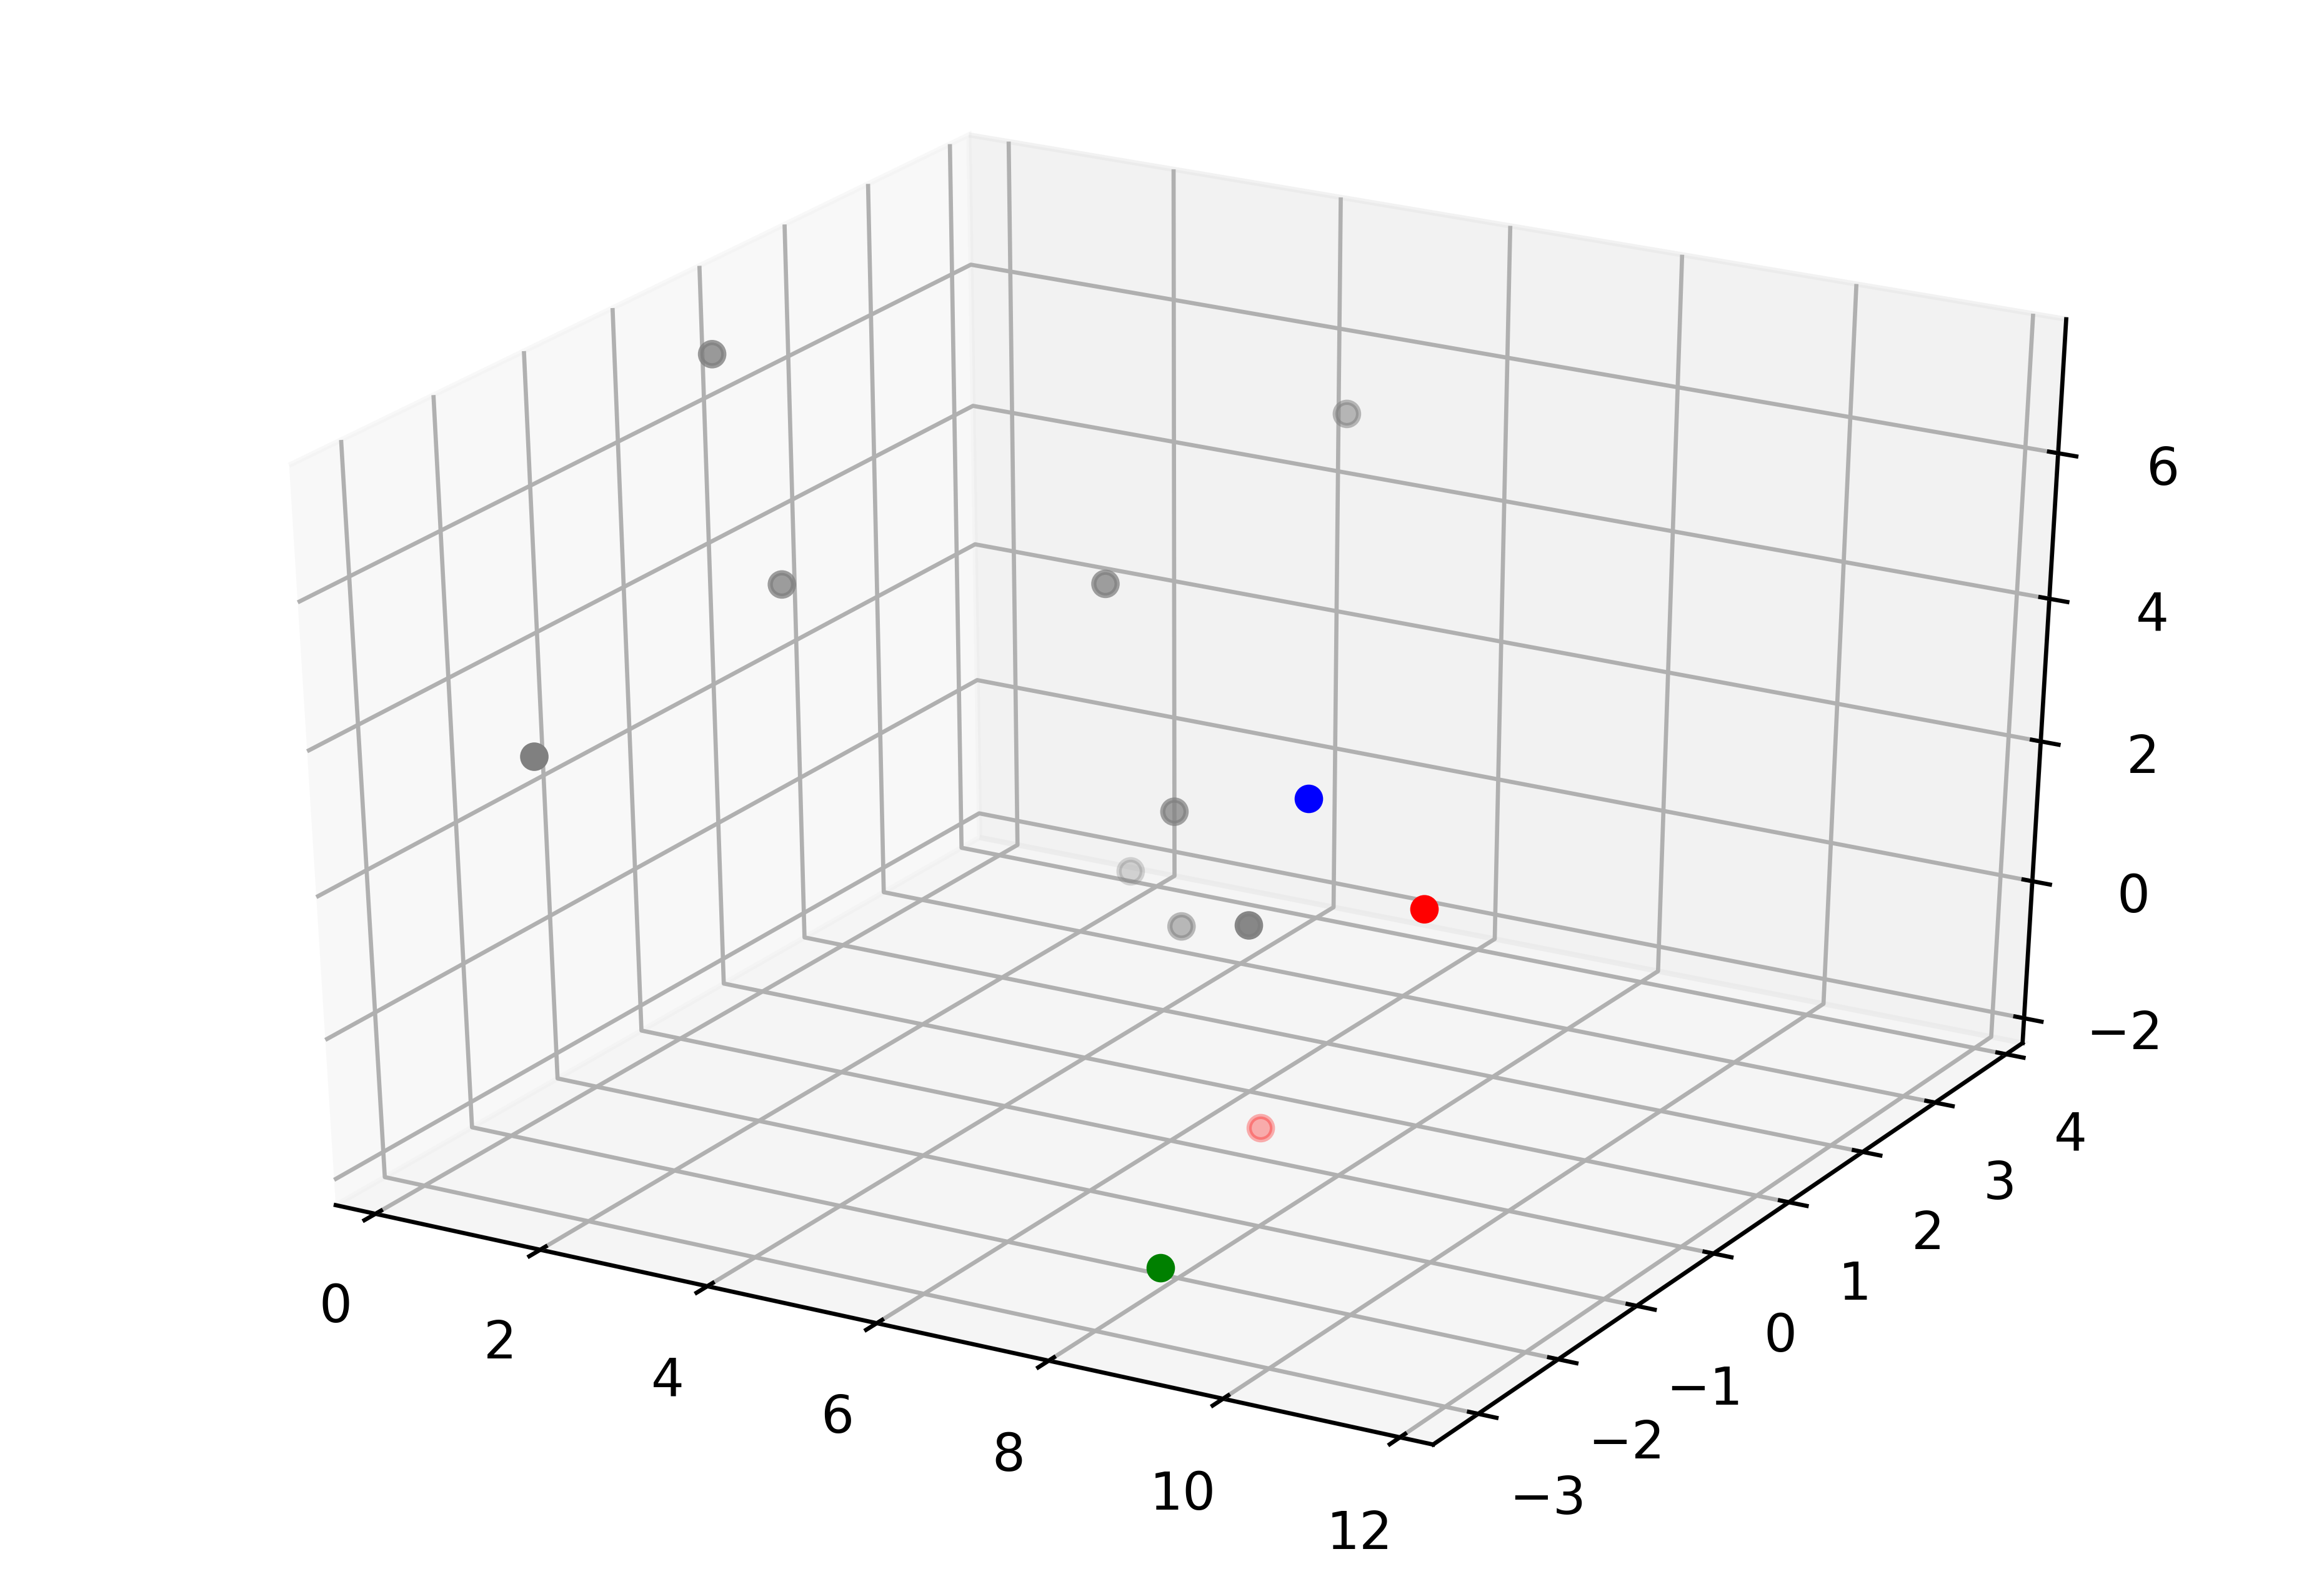

In [46]:
from mpl_toolkits.mplot3d import axes3d, Axes3D #<-- Note the capitalization! 
fig = plt.figure(dpi=600)
coords = mol.atom_coords()
ax = Axes3D(fig)
ax.scatter(querys[np.argmin(esp), 0], querys[np.argmin(esp), 1], querys[np.argmin(esp), 2],c='green')

Cs = coords[mol.atom_charges()==6]
ax.scatter(Cs[:, 0], Cs[:, 1], Cs[:, 2],c="grey")

Cs = coords[mol.atom_charges()==7]
ax.scatter(Cs[:, 0], Cs[:, 1], Cs[:, 2],c="blue")

Cs = coords[mol.atom_charges()==8]
ax.scatter(Cs[:, 0], Cs[:, 1], Cs[:, 2],c="red")

In [66]:
#N -0.02729740906995559
#OH -0.08822738365236305
#O -0.09396613928663555
querys[np.argmin(esp)]/1.88973

array([ 4.28201676, -1.7798103 ,  2.63327652])

In [67]:
mol2 = pyscf.gto.Mole()
mol2.atom = '''C    1.5147581    1.4639280   -0.5857809 
C    2.6655760    0.6074861   -0.1584450 
C    3.0322940    0.1780883    1.0801029 
C    2.3156168    0.4805902    2.3997865 
C    2.4115541    1.9785282    2.7598614 
C    0.8696774   -0.1067064    2.4459557 
C    0.8815079   -1.6185099    2.1664647 
C    0.1752930    0.1773510    3.7877438 
C    4.2776346   -0.6508930    1.0935659 
O    4.8221492   -1.1476605    0.0887116 
N    4.8706621   -0.9070130    2.3143298 
O    6.1134299   -1.5168216    2.2361307 
H    1.8807011    2.3175185   -1.2028682 
H    0.9102261    1.8743706    0.2462678 
H    0.8310188    0.8842321   -1.2503174 
H    3.3259250    0.2606388   -0.9757457 
H    2.8473242   -0.0759801    3.2047019 
H    1.8052835    2.6132310    2.0776478 
H    3.4647233    2.3283809    2.6830830 
H    2.0696254    2.1738929    3.7986951 
H    0.2702764    0.3836607    1.6451599 
H    1.4666829   -2.1615294    2.9439662 
H    1.3342125   -1.8533853    1.1791452 
H   -0.1517205   -2.0306041    2.1753759 
H    0.7681483   -0.2312656    4.6391173 
H   -0.8247149   -0.3088296    3.8173736 
H    0.0199281    1.2625154    3.9702544 
H    4.8323775   -0.2455355    3.0949287 
H    6.1578666   -1.6664084    1.2361224 
H 4.28201676 -1.7798103   2.63327652 '''
mol2.basis = "def2-SVP"
mol2.charge = 1
mol2.build()

In [68]:
calc2 = pyscf.scf.RHF(mol2)
hfe2 = calc2.kernel(verbose=0)

converged SCF energy = -554.696513444908


In [54]:
# O
-0.09396613928663555, -554.3920043785033--554.706060069847

(-0.09396613928663555, 0.3140556913436967)

In [63]:
# OH
-0.08822738365236305, -554.3920043785033--554.683976000675

(-0.08822738365236305, 0.2919716221716726)

In [70]:
#N 
-0.02729740906995559, -554.3920043785033--554.696513444908

(-0.02729740906995559, 0.30450906640464837)

In [71]:
mol2 = pyscf.gto.Mole()
mol2.atom = '''C    1.6121326    1.3990143   -0.5875059 
C    2.7660847    0.5977857   -0.1109012 
C    3.0969886    0.2104778    1.1673610 
C    2.3219475    0.5543119    2.4460184 
C    2.3163605    2.0769018    2.7029228 
C    0.9169851   -0.1306444    2.4898012 
C    1.0353751   -1.6557066    2.3385769 
C    0.1528779    0.2248880    3.7745817 
C    4.3103767   -0.5834317    1.2609808 
O    4.9582127   -0.9659658    0.1838749 
N    4.8224695   -0.9891482    2.4412361 
O    6.0790613   -1.5612718    2.3958449 
H    1.9894053    2.2961414   -1.1343889 
H    0.9033652    1.7238216    0.1947608 
H    1.0571416    0.8129692   -1.3585563 
H    3.4523346    0.2736851   -0.9145442 
H    2.8607446    0.1054439    3.3149737 
H    1.6550326    2.6218180    1.9966615 
H    3.3380712    2.5035452    2.6017453 
H    1.9621379    2.3001074    3.7300040 
H    0.3252597    0.2521935    1.6273247 
H    1.6039826   -2.1006697    3.1878849 
H    1.5348385   -1.9530981    1.3895056 
H    0.0299572   -2.1280140    2.3388003 
H    0.7303992   -0.0645925    4.6827878 
H   -0.8128163   -0.3233424    3.8076321 
H   -0.0826055    1.3074549    3.8473760 
H    4.5641331   -0.5404932    3.3311169 
H    5.9932882   -2.4690518    2.7854432 
H    5.8064875   -1.4162560    0.4651568 '''
mol2.basis = "def2-SVP"
mol2.charge = 1
mol2.build()
calc2 = pyscf.scf.RHF(mol2)
hfe2 = calc2.kernel(verbose=0)

converged SCF energy = -554.760622654469


In [72]:
mol2 = pyscf.gto.Mole()
mol2.atom = '''C    1.6121326    1.3990143   -0.5875059 
C    2.7660847    0.5977857   -0.1109012 
C    3.0969886    0.2104778    1.1673610 
C    2.3219475    0.5543119    2.4460184 
C    2.3163605    2.0769018    2.7029228 
C    0.9169851   -0.1306444    2.4898012 
C    1.0353751   -1.6557066    2.3385769 
C    0.1528779    0.2248880    3.7745817 
C    4.3103767   -0.5834317    1.2609808 
O    4.9582127   -0.9659658    0.1838749 
N    4.8224695   -0.9891482    2.4412361 
O    6.0790613   -1.5612718    2.3958449 
H    1.9894053    2.2961414   -1.1343889 
H    0.9033652    1.7238216    0.1947608 
H    1.0571416    0.8129692   -1.3585563 
H    3.4523346    0.2736851   -0.9145442 
H    2.8607446    0.1054439    3.3149737 
H    1.6550326    2.6218180    1.9966615 
H    3.3380712    2.5035452    2.6017453 
H    1.9621379    2.3001074    3.7300040 
H    0.3252597    0.2521935    1.6273247 
H    1.6039826   -2.1006697    3.1878849 
H    1.5348385   -1.9530981    1.3895056 
H    0.0299572   -2.1280140    2.3388003 
H    0.7303992   -0.0645925    4.6827878 
H   -0.8128163   -0.3233424    3.8076321 
H   -0.0826055    1.3074549    3.8473760 
H    4.5641331   -0.5404932    3.3311169 
H    5.9932882   -2.4690518    2.7854432 '''
mol2.basis = "def2-SVP"
mol2.charge = 0
mol2.build()
calc2 = pyscf.scf.RHF(mol2)
hfe2 = calc2.kernel(verbose=0)

converged SCF energy = -554.365179014427


In [73]:
554.760622654469-554.706060069847

0.054562584621976384

In [74]:
-554.760622654469--554.365179014427

-0.3954436400420036

In [129]:
spacing = 1
start = mol.atom_coords().min(axis=0)-5
stop = mol.atom_coords().max(axis=0)+5
steps = ((stop-start)/spacing).astype(int)
widths = (stop-start) / steps
data = np.zeros(steps)
for nx in range(steps[0]):
    for ny in range(steps[1]):
        for nz in range(steps[2]):
            query = (nx*widths[0]+start[0],ny*widths[1]+start[1],nz*widths[2]+start[2])
            mol.set_rinv_orig_(query)
            data[nx,ny,nz] = -np.matmul(dm1_ao, mol.intor("int1e_rinv")).trace() + nuclei_nuclei(mol.atom_coords(), mol.atom_charges(), query)

In [93]:
import scipy.signal
import scipy.optimize

In [126]:
def func(args):
    mol.set_rinv_orig_(args)
    return -np.matmul(dm1_ao, mol.intor("int1e_rinv")).trace() + nuclei_nuclei(mol.atom_coords(), mol.atom_charges(), args)
scipy.optimize.minimize(func, [8.06788406, 3.00362992, 1.00616279], method='CG')

     fun: -0.008192956504846194
     jac: array([-1.43051147e-06,  0.00000000e+00,  3.09944153e-06])
 message: 'Optimization terminated successfully.'
    nfev: 150
     nit: 7
    njev: 30
  status: 0
 success: True
       x: array([7.42006169, 3.16472202, 1.15918285])

In [118]:
import numpy as np
import scipy.ndimage.filters as filters
import scipy.ndimage.morphology as morphology

def detect_local_minima(arr):
    # https://stackoverflow.com/questions/3684484/peak-detection-in-a-2d-array/3689710#3689710
    """
    Takes an array and detects the troughs using the local maximum filter.
    Returns a boolean mask of the troughs (i.e. 1 when
    the pixel's value is the neighborhood maximum, 0 otherwise)
    """
    # define an connected neighborhood
    # http://www.scipy.org/doc/api_docs/SciPy.ndimage.morphology.html#generate_binary_structure
    neighborhood = morphology.generate_binary_structure(len(arr.shape),2)
    # apply the local minimum filter; all locations of minimum value 
    # in their neighborhood are set to 1
    # http://www.scipy.org/doc/api_docs/SciPy.ndimage.filters.html#minimum_filter
    local_min = (filters.minimum_filter(arr, footprint=neighborhood)==arr)
    # local_min is a mask that contains the peaks we are 
    # looking for, but also the background.
    # In order to isolate the peaks we must remove the background from the mask.
    # 
    # we create the mask of the background
    background = (arr==0)
    # 
    # a little technicality: we must erode the background in order to 
    # successfully subtract it from local_min, otherwise a line will 
    # appear along the background border (artifact of the local minimum filter)
    # http://www.scipy.org/doc/api_docs/SciPy.ndimage.morphology.html#binary_erosion
    eroded_background = morphology.binary_erosion(
        background, structure=neighborhood, border_value=1)
    # 
    # we obtain the final mask, containing only peaks, 
    # by removing the background from the local_min mask
    detected_minima = local_min ^ eroded_background
    return np.where(detected_minima)

In [128]:
for i in np.array(detect_local_minima(data)).T:
    if 0 in i:
        continue
    print (i, func(i*widths), i*widths)

[15  6  2] -0.007819810282946094 [7.56364131 3.00362992 1.00616279]


In [120]:
data.shape

(23, 19, 21)

In [ ]:
func()